In [1]:
import json

bvh_dataset = "./datasets/mocap/dataset_v2.json"
triang_data_file = "./datasets/mediapipe/triangulation.json"
selected_names_file = "./datasets/mediapipe/selected_joint_names.json"

with open(bvh_dataset, 'r') as file:
    data_3d = json.load(file)

with open(selected_names_file, 'r') as file:
    selected_names = json.load(file)

with open(triang_data_file, 'r') as file:
    triangulation_data = json.load(file)


In [2]:
selected_seq = data_3d['p4s1']

In [3]:
selected_seq[0]

{'lfemur': [8.287893295288086, 3.8033363819122314, 0.1163821816444397],
 'ltibia': [8.421300888061523, 1.9008748531341553, -0.06309393048286438],
 'lfoot': [8.760259628295898, 0.10237276554107666, -0.25035858154296875],
 'rfemur': [8.18842601776123, 3.7926883697509766, -1.07268226146698],
 'rtibia': [8.296483039855957, 1.9781861305236816, -0.8983211517333984],
 'rfoot': [8.633221626281738, 0.10214114189147949, -0.6843364834785461],
 'lhumerus': [8.38395881652832, 6.197987079620361, 0.21688944101333618],
 'lradius': [8.672024726867676, 4.811230659484863, 0.4203581213951111],
 'lwrist': [8.540379524230957, 4.099964141845703, 0.6149471998214722],
 'rhumerus': [8.48794174194336, 6.167164325714111, -1.29099440574646],
 'rradius': [8.553568840026855, 4.7409796714782715, -1.4208775758743286],
 'rwrist': [8.41553020477295, 4.018771648406982, -1.5357036590576172]}

In [4]:
SCALE_FACTOR = 255

lfoot_height_z = [frame['lfoot'][1]*SCALE_FACTOR for frame in selected_seq]
rfoot_height_z = [frame['rfoot'][1]*SCALE_FACTOR for frame in selected_seq]


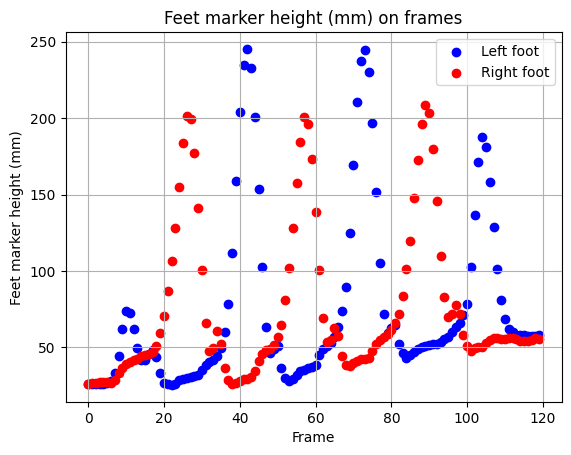

In [5]:
import matplotlib.pyplot as plt

frame_num = [i for i in range(len(lfoot_height_z))]

plt.scatter(frame_num, lfoot_height_z, color='blue', label='Left foot')
plt.scatter(frame_num, rfoot_height_z, color='red', label='Right foot')

plt.title('Feet marker height (mm) on frames')
plt.legend()

plt.xlabel('Frame')
plt.ylabel('Feet marker height (mm)')
plt.grid(True)
plt.show()

In [6]:
def find_local_minima(data, window_size=5):
    local_minima_indices = []
    
    for i in range(window_size, len(data) - window_size):
        window_prev = data[i-window_size:i]
        window_next = data[i+1:i+window_size+1]
        current = data[i]
        
        if current < min(window_prev) and current < min(window_next):
            local_minima_indices.append(i)

    return local_minima_indices


print("Local minima indices lfoot:", find_local_minima(lfoot_height_z, 10))

Local minima indices lfoot: [22, 53, 84]


In [7]:
print("Local minima indices rfoot:", find_local_minima(rfoot_height_z, 10))

Local minima indices rfoot: [38, 69, 101]


In [8]:
from scripts.parsers import parse_sequences as parse_sequence_info

file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequence_info(file_path)

In [9]:
for sequence, params in sequences.items():
    if params['MoCap_data']:
        lfoot_height_z = [frame['lfoot'][1]*SCALE_FACTOR for frame in data_3d[sequence]]
        rfoot_height_z = [frame['rfoot'][1]*SCALE_FACTOR for frame in data_3d[sequence]]
        left_minima = find_local_minima(lfoot_height_z, 10)
        right_minima = find_local_minima(rfoot_height_z, 10)
        
        sorted_minima = sorted(right_minima + left_minima)
        order = ""

        for minim in sorted_minima:
            if minim in left_minima:
                order += "L"
            else:
                order += "R"

        alternately = True
        for i in range(len(order) - 1):
            if order[i] == order[i+1]:
                alternately = False
                break

        print(f"{sequence} | {'OK' if alternately else 'NO NO NO NO NO' } | {order} | L: {left_minima} | R: {right_minima}")

p1s1 | OK | LRLRLRL | L: [19, 51, 83, 114] | R: [36, 67, 98]
p1s2 | OK | LRLRLR | L: [22, 53, 84] | R: [38, 68, 99]
p1s3 | OK | LRLRLRL | L: [17, 47, 77, 107] | R: [32, 62, 92]
p1s4 | OK | LRLRLR | L: [18, 48, 78] | R: [34, 64, 95]
p2s1 | OK | RLRLRLRL | L: [36, 66, 96, 123] | R: [23, 52, 81, 112]
p2s2 | OK | RLRLRLR | L: [29, 56, 84] | R: [18, 44, 70, 99]
p2s3 | OK | LRLRLRL | L: [19, 48, 76, 106] | R: [34, 63, 91]
p2s4 | OK | LRLRLRLR | L: [10, 35, 61, 88] | R: [23, 50, 74, 103]
p3s1 | OK | LRLRLRLR | L: [16, 48, 78, 104] | R: [35, 64, 94, 127]
p3s2 | OK | RLRLRLR | L: [27, 52, 80] | R: [14, 40, 66, 95]
p3s3 | OK | LRLRLRLR | L: [17, 50, 79, 109] | R: [34, 65, 96, 128]
p3s4 | OK | RLRLRLR | L: [36, 61, 87] | R: [23, 49, 74, 100]
p4s1 | OK | LRLRLR | L: [22, 53, 84] | R: [38, 69, 101]
p4s2 | OK | LRLRLR | L: [20, 51, 81] | R: [37, 67, 97]
p4s3 | OK | RLRLRL | L: [36, 67, 101] | R: [20, 51, 83]
p4s4 | OK | RLRLRL | L: [35, 65, 96] | R: [18, 50, 81]
p5s1 | OK | RLRLRLRL | L: [36, 69, 10

In [197]:
from dataclasses import dataclass, field, fields
from typing import Sequence, Mapping, Tuple

@dataclass
class CoordinatesIdx:
    x: int = field(default=0)
    y: int = field(default=1)
    z: int = field(default=2)   

    def __post_init__(self):
        assert self.x != self.y
        assert self.x != self.z
        assert self.y != self.z
        for field in fields(self):
            assert getattr(self, field.name) in [0, 1, 2]


class GaitParametersExtractor():
    FPS = 25
    FRAME_TIME = 1/FPS 
    """
    Class to extract basic gait parameters based on 3D frame.
    """
    def __init__(self, sequence_parameters: Sequence[Mapping], coordintates_idx: CoordinatesIdx=CoordinatesIdx, scale_factor:int=255):
        self.seq_params = sequence_parameters
        self.scale_factor = scale_factor
        self.c_idx = coordintates_idx
        self.l_steps, self.r_steps = self._find_step_frames()
        self.all_steps = sorted(self.l_steps + self.r_steps)

    def _find_step_frames(self) -> Tuple[Sequence, Sequence]:
        """
        Function to find step frames (minimum foot marker position in sequence.
        Output as two lists - first with frames number with left foot steps, second for right foot.
        """
        lfoot_height_z = [frame['lfoot'][self.c_idx.z]*SCALE_FACTOR for frame in self.seq_params]
        rfoot_height_z = [frame['rfoot'][self.c_idx.z]*SCALE_FACTOR for frame in self.seq_params]
        left_minima = self.__find_local_minima(lfoot_height_z, 10)
        right_minima = self.__find_local_minima(rfoot_height_z, 10)

        if not self.__check_if_left_right_alternately(left_minima, right_minima):
            # If not left right alternately check without first or last item on list - start and end of sequence might be problematic
            if left_minima[0] <= right_minima[0] and self.__check_if_left_right_alternately(left_minima[1:], right_minima):
                left_minima = left_minima[1:]
                print("First left step recognized as probably marked incorrectly and removed")
            elif right_minima[0] <= left_minima[0] and self.__check_if_left_right_alternately(left_minima, right_minima[1:]):
                right_minima = right_minima[1:]
                print("First right step recognized as probably marked incorrectly and removed")
            elif left_minima[-1] <= right_minima[-1] and self.__check_if_left_right_alternately(left_minima[:-1], right_minima):
                left_minima = left_minima[:-1]
                print("Last left step recognized as probably marked incorrectly and removed")
            elif right_minima[-1] <= left_minima[-1] and self.__check_if_left_right_alternately(left_minima, right_minima[:-1]):
                right_minima = right_minima[:-1]
                print("Last right step recognized as probably marked incorrectly and removed")

        if not self.__check_if_left_right_alternately(left_minima, right_minima):
            print("Falied to find proper step frame keys")
            return [], []

        return left_minima, right_minima

    def calculate_mean_stride_time_and_length(self) -> Tuple[float, float, float, float, float, float]:
        """
        Stride time - the time between the consecutive initial contacts of the same foot.
        Stride length - the distance between the consecutive initial contacts of the same foot. 
        Output as six floats: left foot mean stride time, right foot mean stride time, mean stride time,
        left foot mean stride length, right foot mean stride length, mean stride length.
        Time unit is [s], distance unit is [mm].
        """
        
        l_stride_times = []
        l_stride_dist = []
        for i in range(len(self.l_steps)-1):
            l_stride_times.append(self.FRAME_TIME * (self.l_steps[i+1] - self.l_steps[i]))
            l_stride_dist.append(abs(self.seq_params[self.l_steps[i+1]]['lfoot'][self.c_idx.y] 
                                     - self.seq_params[self.l_steps[i]]['lfoot'][self.c_idx.y]) * self.scale_factor)

        r_stride_times = []
        r_stride_dist = []
        for i in range(len(self.r_steps)-1):
            r_stride_times.append(self.FRAME_TIME * (self.r_steps[i+1] - self.r_steps[i]))
            r_stride_dist.append(abs(self.seq_params[self.r_steps[i+1]]['rfoot'][self.c_idx.y] 
                                     - self.seq_params[self.r_steps[i]]['rfoot'][self.c_idx.y]) * self.scale_factor)

        stride_times = r_stride_times + l_stride_times
        l_mean_stride_time = sum(l_stride_times)/len(l_stride_times)
        r_mean_stride_time = sum(r_stride_times)/len(r_stride_times)
        total_mean_stride_time = sum(stride_times)/len(stride_times)

        stride_dist = r_stride_dist + l_stride_dist
        l_mean_stride_dist = sum(l_stride_dist)/len(l_stride_dist)
        r_mean_stride_dist = sum(r_stride_dist)/len(r_stride_dist)
        total_mean_stride_dist = sum(stride_dist)/len(stride_dist)
        
        return (l_mean_stride_time, r_mean_stride_time, total_mean_stride_time, 
                l_mean_stride_dist, r_mean_stride_dist, total_mean_stride_dist)

    def calculate_mean_step_time(self) -> Tuple[float, float, float, float, float]:
        """
        Step time - the time between the initial contact of one foot and the initial contact of the contralateral foot.
        Step length - the distance between the initial contact of one foot and the initial contact of the contralateral foot.
        Step width - the distance between the points of initial contact of opposite feet during a step.
        Output as seve floats: left to right foot mean step time, right to left foot mean step time and total mean step time,
        left to right foot mean step length, right to left foot mean step length and total mean step length.
        Time unit is [s], distance unit is [mm].
        """

        step_times = []
        l_r_step_dist = []
        r_l_step_dist = []
        step_width = []
        for i in range(len(self.all_steps)-1):
            step_times.append(self.FRAME_TIME * (self.all_steps[i+1] - self.all_steps[i]))
            if self.all_steps[i] in self.l_steps:
                l_r_step_dist.append(abs(self.seq_params[self.all_steps[i+1]]['rfoot'][self.c_idx.y] 
                                         - self.seq_params[self.all_steps[i]]['lfoot'][self.c_idx.y]) * self.scale_factor)

                step_width.append(abs(self.seq_params[self.all_steps[i+1]]['rfoot'][self.c_idx.x] 
                                      - self.seq_params[self.all_steps[i]]['lfoot'][self.c_idx.x]) * self.scale_factor)
            else:
                r_l_step_dist.append(abs(self.seq_params[self.all_steps[i+1]]['lfoot'][self.c_idx.y] 
                                         - self.seq_params[self.all_steps[i]]['rfoot'][self.c_idx.y]) * self.scale_factor)

                step_width.append(abs(self.seq_params[self.all_steps[i+1]]['lfoot'][self.c_idx.x] 
                                      - self.seq_params[self.all_steps[i]]['rfoot'][self.c_idx.x]) * self.scale_factor)

        if self.all_steps[0] == self.l_steps[0]:
            l_r_step_time = step_times[0::2]
            r_l_step_time = step_times[1::2]
        else:
            l_r_step_time = step_times[1::2]
            r_l_step_time = step_times[0::2]

        l_r_mean_step_times = sum(l_r_step_time)/len(l_r_step_time)
        r_l_mean_step_times = sum(r_l_step_time)/len(r_l_step_time)
        total_mean_step_times = sum(step_times)/len(step_times)

        step_dist = l_r_step_dist + r_l_step_dist
        total_mean_step_distance = sum(step_dist)/len(step_dist)
        l_r_mean_step_dist = sum(l_r_step_dist)/len(l_r_step_dist)
        r_l_mean_step_dist = sum(r_l_step_dist)/len(r_l_step_dist)
           
        mean_step_width = sum(step_width)/len(step_width)
        
        return (l_r_mean_step_times, r_l_mean_step_times, total_mean_step_times, 
                l_r_mean_step_dist, r_l_mean_step_dist, total_mean_step_distance,
                mean_step_width)


    @staticmethod
    def __find_local_minima(data, window_size:int=5) -> Sequence[int]:
        local_minima_indices = []
        
        for i in range(window_size, len(data) - window_size):
            window_prev = data[i-window_size:i]
            window_next = data[i+1:i+window_size+1]
            current = data[i]
            
            if current < min(window_prev) and current < min(window_next):
                local_minima_indices.append(i)
    
        return local_minima_indices

    @staticmethod
    def __check_if_left_right_alternately(left_minima, right_minima):
        sorted_minima = sorted(right_minima + left_minima)
        order=""

        for minim in sorted_minima:
            if minim in left_minima:
                order += "L"
            else:
                order += "R"

        alternately = True
        for i in range(len(order) - 1):
            if order[i] == order[i+1]:
                alternately = False
                break

        return alternately
        
        

In [203]:
gpe = GaitParametersExtractor(data_3d['p5s1'], CoordinatesIdx(2, 0, 1))

In [204]:
gpe.r_steps

[21, 53, 85, 118]

In [205]:
gpe.l_steps

[36, 69, 101, 134]

In [206]:
gpe.calculate_mean_stride_time_and_length()

(1.3066666666666666,
 1.2933333333333332,
 1.3,
 1103.6674571037292,
 1153.5144186019897,
 1128.5909378528595)

In [207]:
gpe.calculate_mean_step_time()

(0.6666666666666666,
 0.63,
 0.6457142857142858,
 605.8639261126518,
 510.1011999696493,
 551.1423683166504,
 80.01700203333583)